# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Import the libraries you'll need here.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy.stats as stats

# Load the cars csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())

720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.info()
print(f"Engine HP has {df['Engine HP'].isnull().sum()} null values")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11194 non-null  object 
 1   Model              11194 non-null  object 
 2   Year               11194 non-null  int64  
 3   Engine Fuel Type   11191 non-null  object 
 4   Engine HP          11125 non-null  float64
 5   Engine Cylinders   11164 non-null  float64
 6   Transmission Type  11194 non-null  object 
 7   Driven_Wheels      11194 non-null  object 
 8   Number of Doors    11188 non-null  float64
 9   Vehicle Size       11194 non-null  object 
 10  Vehicle Style      11194 non-null  object 
 11  highway MPG        11194 non-null  int64  
 12  city mpg           11194 non-null  int64  
 13  Popularity         11194 non-null  int64  
 14  MSRP               11194 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB
Engine HP has

In [7]:
# * Print how long (aka how many rows) our dataframe is.
print(df.shape[0])

11194


In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape[0])

11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

<AxesSubplot:>

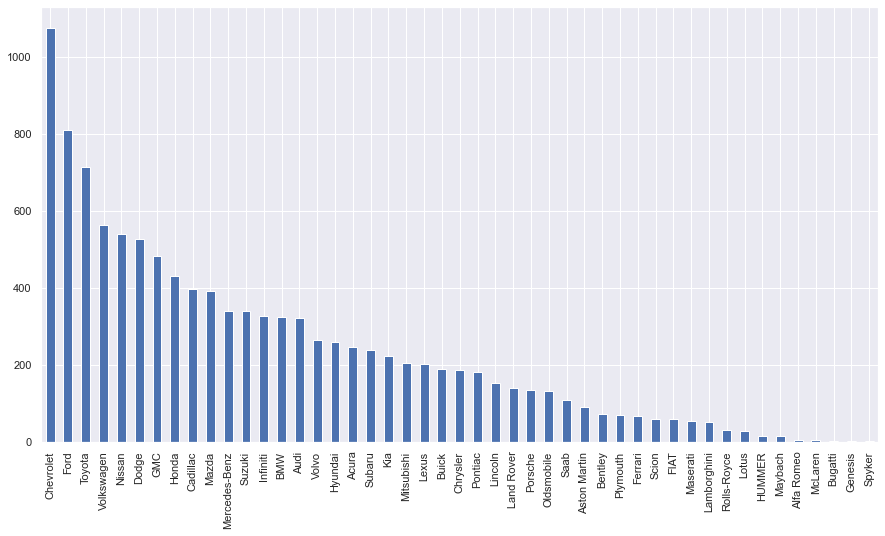

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
make_counts = df['Make'].value_counts()
make_counts.plot(kind='bar', figsize=(15,8))

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

<AxesSubplot:>

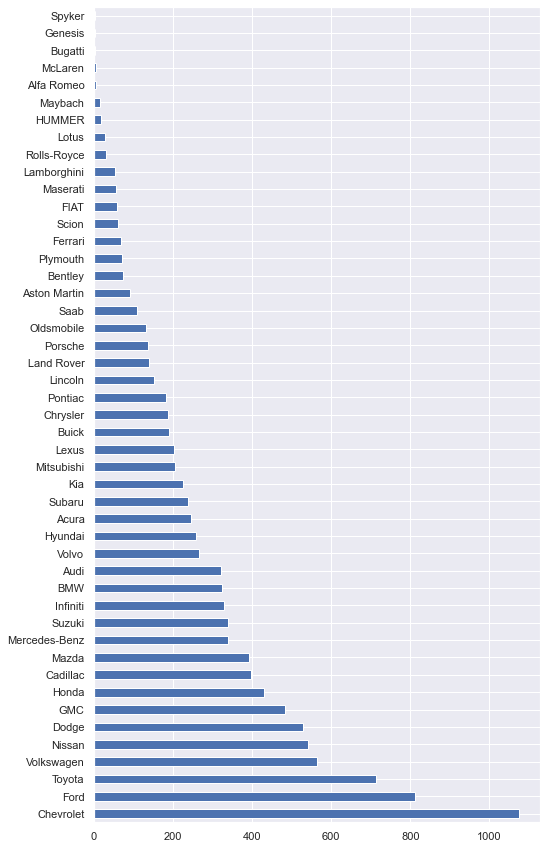

In [11]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
make_counts.plot(kind='barh', figsize=(8,15))

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

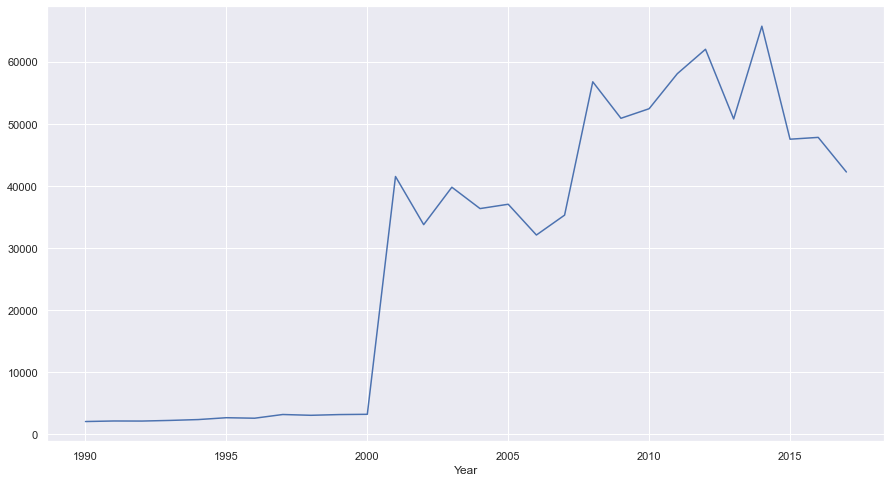

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb = df.groupby(by='Year')['MSRP'].mean()
gb.plot(kind='line', figsize=(15,8))

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [13]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
df['Adjusted_price'] = np.where(df['Year'] <= 2000, df['MSRP'] * 10, df['MSRP'])
df[df['Year'] < 2000].head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

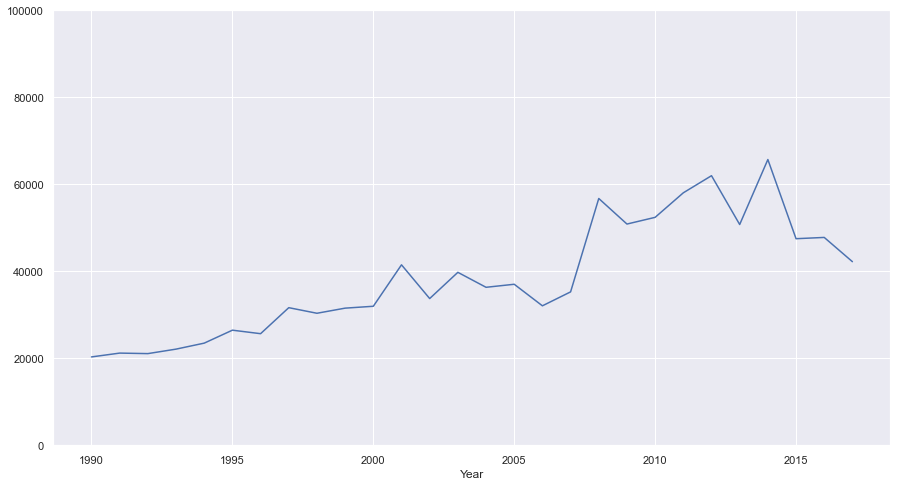

In [14]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
gb = df.groupby(by='Year')['Adjusted_price'].mean()
gb.plot(kind='line', figsize=(15,8), ylim=(0,100000))

# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

In [15]:
# What top 5 car makers make the most expensive cars on average. 
# Calculate means for dataframe groubped by Make
df_top5_msrp = df.groupby(by='Make').agg('mean')

# Sort group_by object by Adjusted_price mean in descending order
df_top5_msrp = df_top5_msrp.sort_values(by='Adjusted_price', ascending=False)

# get first 5 rows and take the Adjusted_price column
df_top5_msrp = df_top5_msrp.head(5)['Adjusted_price']

df_top5_msrp

Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: Adjusted_price, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?
df_top5_med_mpg = df.groupby(by='Make').agg('median')

df_top5_med_mpg = df_top5_med_mpg.sort_values(by='highway MPG', ascending=False)

df_top5_med_mpg = df_top5_med_mpg.head(5)['highway MPG']

df_top5_med_mpg

Make
Alfa Romeo    34.0
FIAT          33.0
Volkswagen    32.0
Scion         32.0
Honda         32.0
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

<AxesSubplot:xlabel='Adjusted_price', ylabel='Count'>

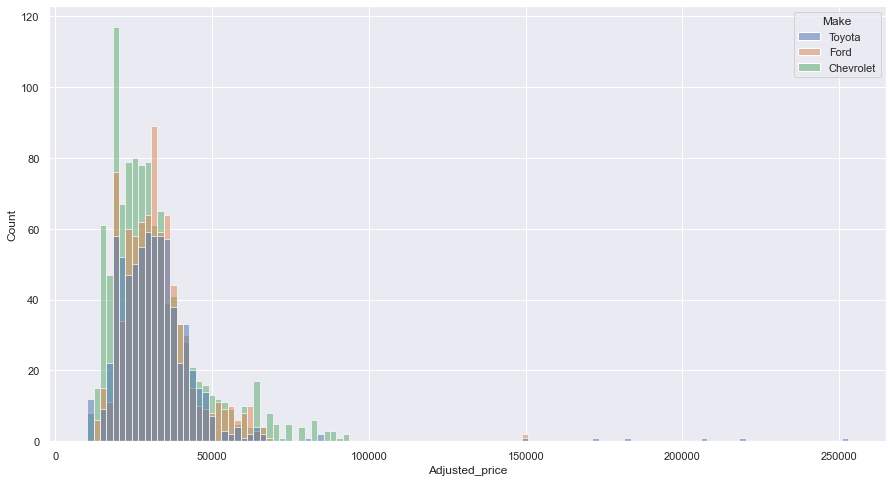

In [17]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
condition = df['Make'].isin(['Chevrolet', 'Ford', 'Toyota'])
df_filtered = df[condition]

fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(ax=ax, data=df_filtered, x='Adjusted_price', hue='Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

<AxesSubplot:xlabel='Adjusted_price', ylabel='Count'>

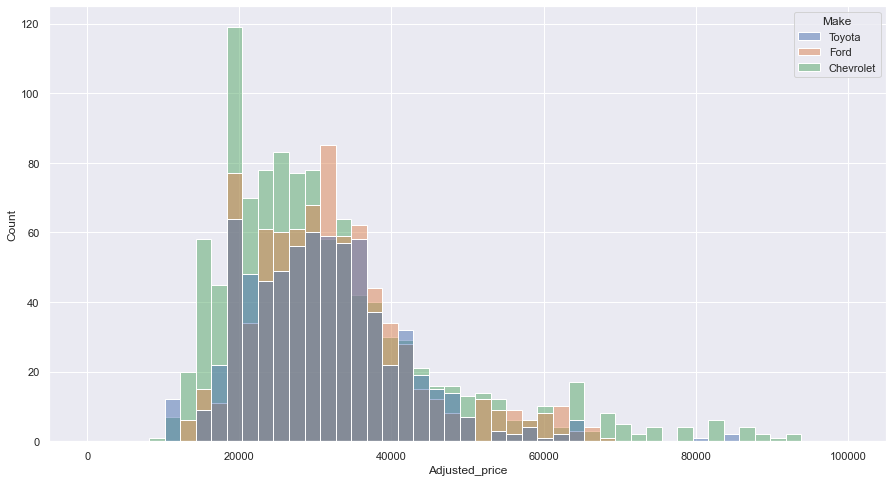

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(ax=ax, data=df_filtered, x='Adjusted_price', hue='Make', binrange=(0,100000))

# Plot the relationship between Engine HP and highway MPG

<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

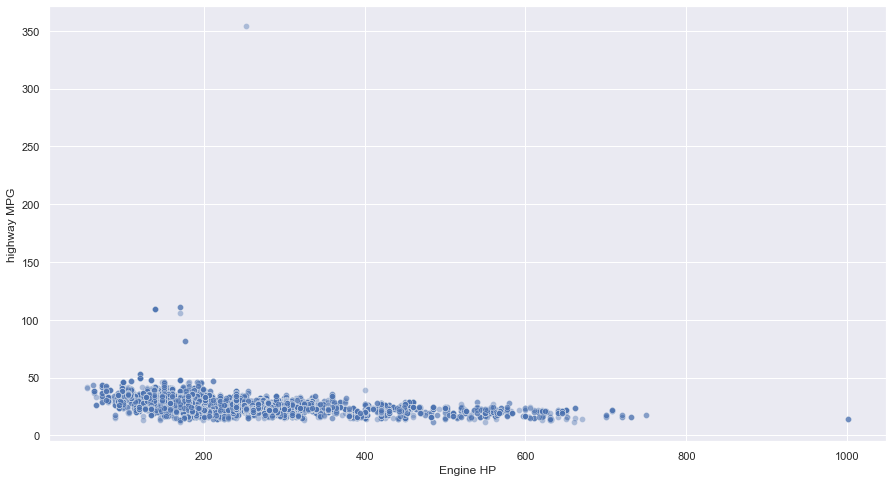

In [59]:
# Plot the relationship between Engine HP and highway MPG
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(ax=ax, data=df, x='Engine HP', y='highway MPG', alpha=0.4)

# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

(11092, 18)
(10910, 18)


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

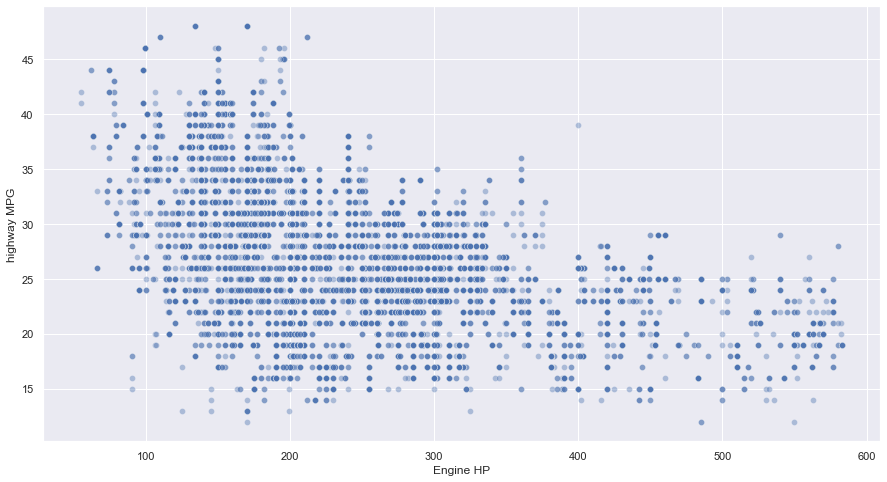

In [60]:
# Remove any statisical outliers from Engine HP and highway MPG
columns = ['highway MPG', 'Engine HP']
new_columns = [(col + '_zscore') for col in columns]

for col, new_col in zip(columns, new_columns):
    df[new_col] = stats.stats.zscore(df[col])
    df[new_col] = abs(df[new_col])

condition = df[new_columns] < 3
condition = condition.all(axis=1)

new_df = df[condition]
print(df.shape)
print(new_df.shape)

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=new_df, x='Engine HP', y='highway MPG', alpha=0.4)

# What does this plot tell you about how Engine HP affects highway MPG?

In [63]:
# What does this plot tell you about how Engine HP affects highway MPG?
print(new_df[columns].corr())
print('Engine HP and highway have a negative correlation. The higher the Engine HP, the smaller the highway MPG')

             highway MPG  Engine HP
highway MPG     1.000000  -0.485945
Engine HP      -0.485945   1.000000
Engine HP and highway have a negative correlation. The higher the Engine HP, the smaller the highway MPG


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

c:\dev\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


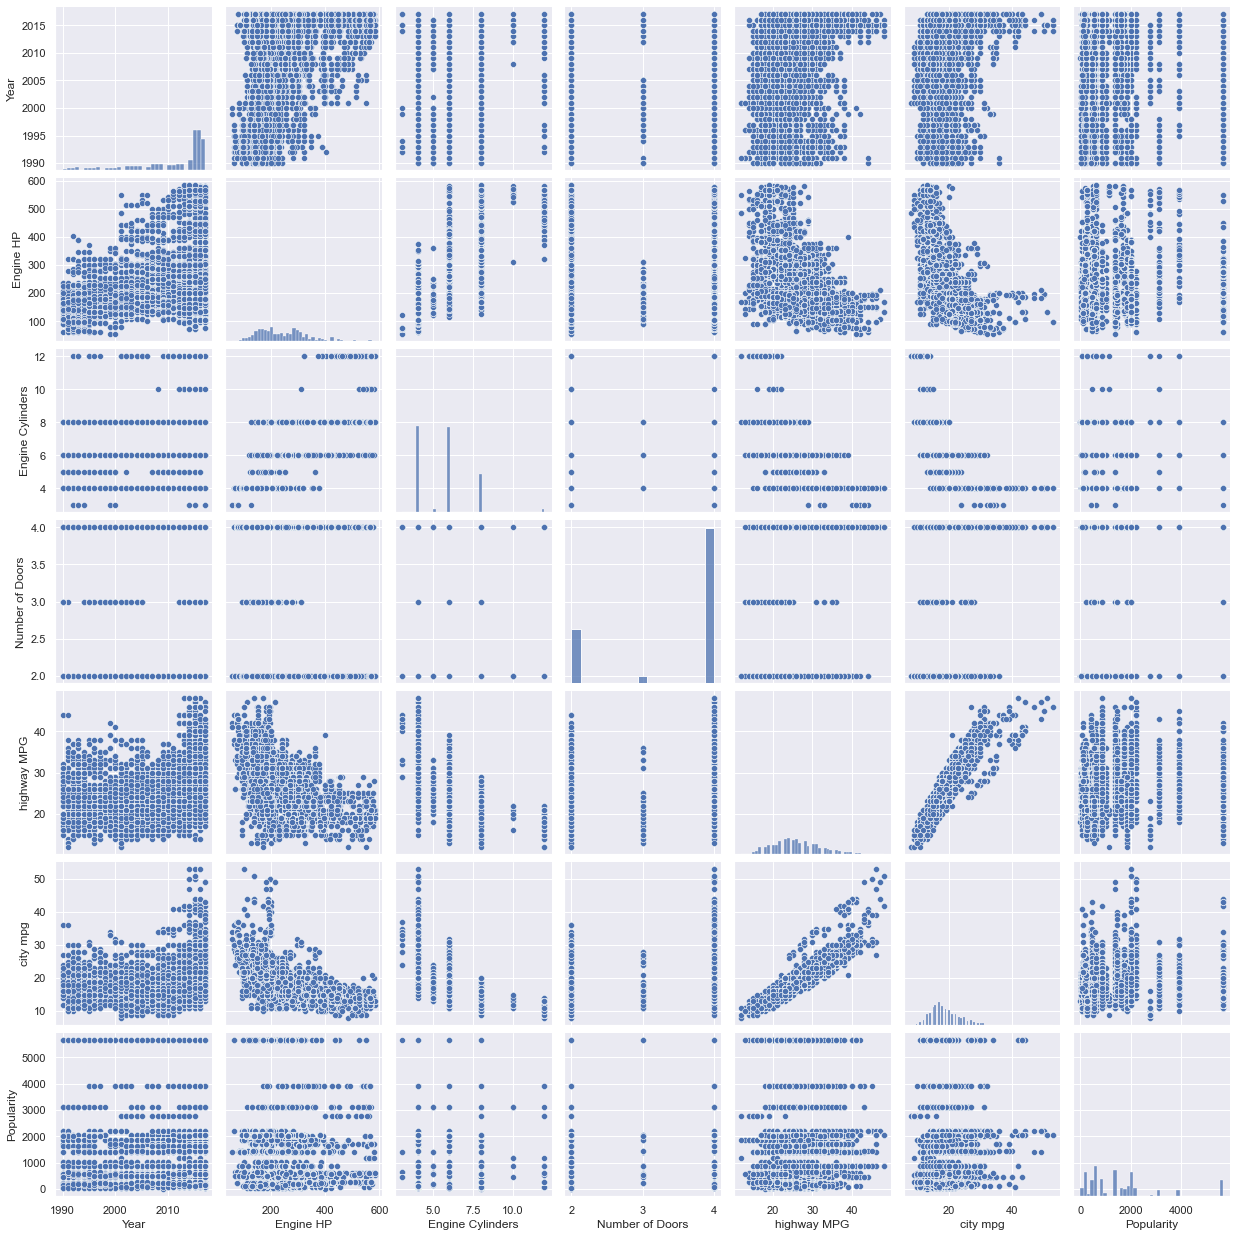

In [66]:
# Using a pairplot, display all of the linear relationship.
drop_columns = 
new_df.drop(labels=['MSRP', 'Adjusted_price'] + new_columns, axis=1, inplace=True)
sns.pairplot(data=new_df)

In [67]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('Highway MPG and city mpg are the most related')

Highway MPG and city mpg are the most related


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

<AxesSubplot:>

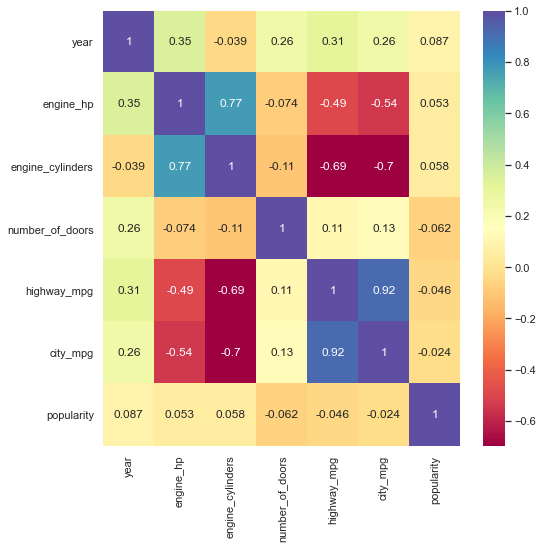

In [97]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(new_df.corr(), annot=True, cmap='Spectral', ax=ax)

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



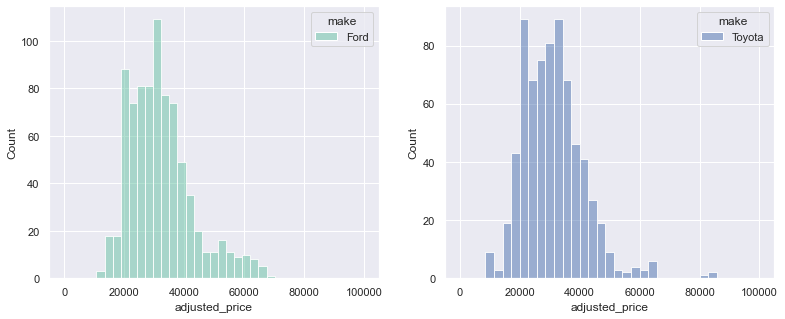

In [109]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

f, axes = plt.subplots(1,2,figsize=(13,5))
ax1 = sns.histplot(data=df[df['make'] == 'Ford'], x='adjusted_price', hue='make', palette='BuGn', binrange=(0,100000), ax=axes[0])
ax2 = sns.histplot(data=df[df['make'] == 'Toyota'], x='adjusted_price', hue='make', binrange=(0,100000), ax=axes[1])

# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 

In [110]:
#!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\dev\python39\python.exe -m pip install --upgrade pip' command.


In [140]:
from plotly.subplots import make_subplots as msp
import plotly.graph_objects as go

# Remove outliers in msrp
df['msrp_zscore'] = stats.stats.zscore(df['adjusted_price'])
df = df[df['msrp_zscore'] < 3]

toyota = df[df['make'] == 'Toyota']
ford = df[df['make'] == 'Ford']

fig = msp(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=toyota['adjusted_price'], name='Toyota'),
    row=1, col=1)

fig.add_trace(
    go.Histogram(x=ford['adjusted_price'], name='Ford'),
    row=1, col=2)

fig.show()